<p>
<h1><b><center></center></b></h1>
<center><img src="https://drive.google.com/uc?id=1UJc1ci41G6ahJ7ProKvunUOIBcTXZ6ZG" align="center" width="550"></center>
</p>
<h1><b><center>Relatividad y Gravitación</center></b></h1>
<h2><b><center>Prof. Jorge I. Zuluaga</center></b></h1>
<h2><b><center>Problem Set 2</center></b><h2>
<h3><b><center>Transformaciones de Lorentz-Einsteins</center></b><h3>
<h5><center><b>Asignada</b>: Jueves 12 de Septiembre de 2024</center><h5>
<h5><center><b>Entrega</b>: Jueves 19 de septiembre de 2024</center><h5>

A continuación se presentan un conjunto de ejercicios o problemas para resolver usando la teoría vista en las últimas lecciones del curso. Resuelva los ejercicios *a mano* y suba una versión digitalizada en el espacio del ítem respectivo en Google Classroom.

1. Las transformaciones generalizadas de Lorentz-Einsteins (para cualquier dirección de la velocidad) fueron deducidas por Gustav Herglotz en 1911 y se escriben en notación moderna y en unidades relativistas como:

   $$
\begin{aligned}
t^{\prime} & =-\gamma\left(u_x x+u_y y+u_z z\right)+\gamma t \\
x^{\prime} & =x+\alpha u_x\left(u_x x+u_y y+u_z z\right)-\gamma u_x t \\
y^{\prime} & =y+\alpha u_y\left(u_x x+u_y y+u_z z\right)-\gamma u_y t \\
z^{\prime} & =z+\alpha u_z\left(u_x x+u_y y+u_z z\right)-\gamma u_z t \\
\alpha & =\frac{\gamma^2}{\gamma+1}, \gamma=\frac{1}{\sqrt{1-u^2}}
\end{aligned}
$$

  Demuestre que estas mismas transformaciones pueden escribirse en notación vectorial como:

  $$
\begin{aligned}
t^{\prime} & =\gamma\left(t-\vec{u} \cdot \vec{r}\right) \\
\vec{r}^{\prime} & =\vec{r}+\left(\frac{\gamma-1}{u^2} \vec{u} \cdot \vec{r}-\gamma t\right) \vec{u}
\end{aligned}
  $$
  donde para ser consistentes con la notación no hemos incluído el subíndice $L$ que usamos en otras partes.

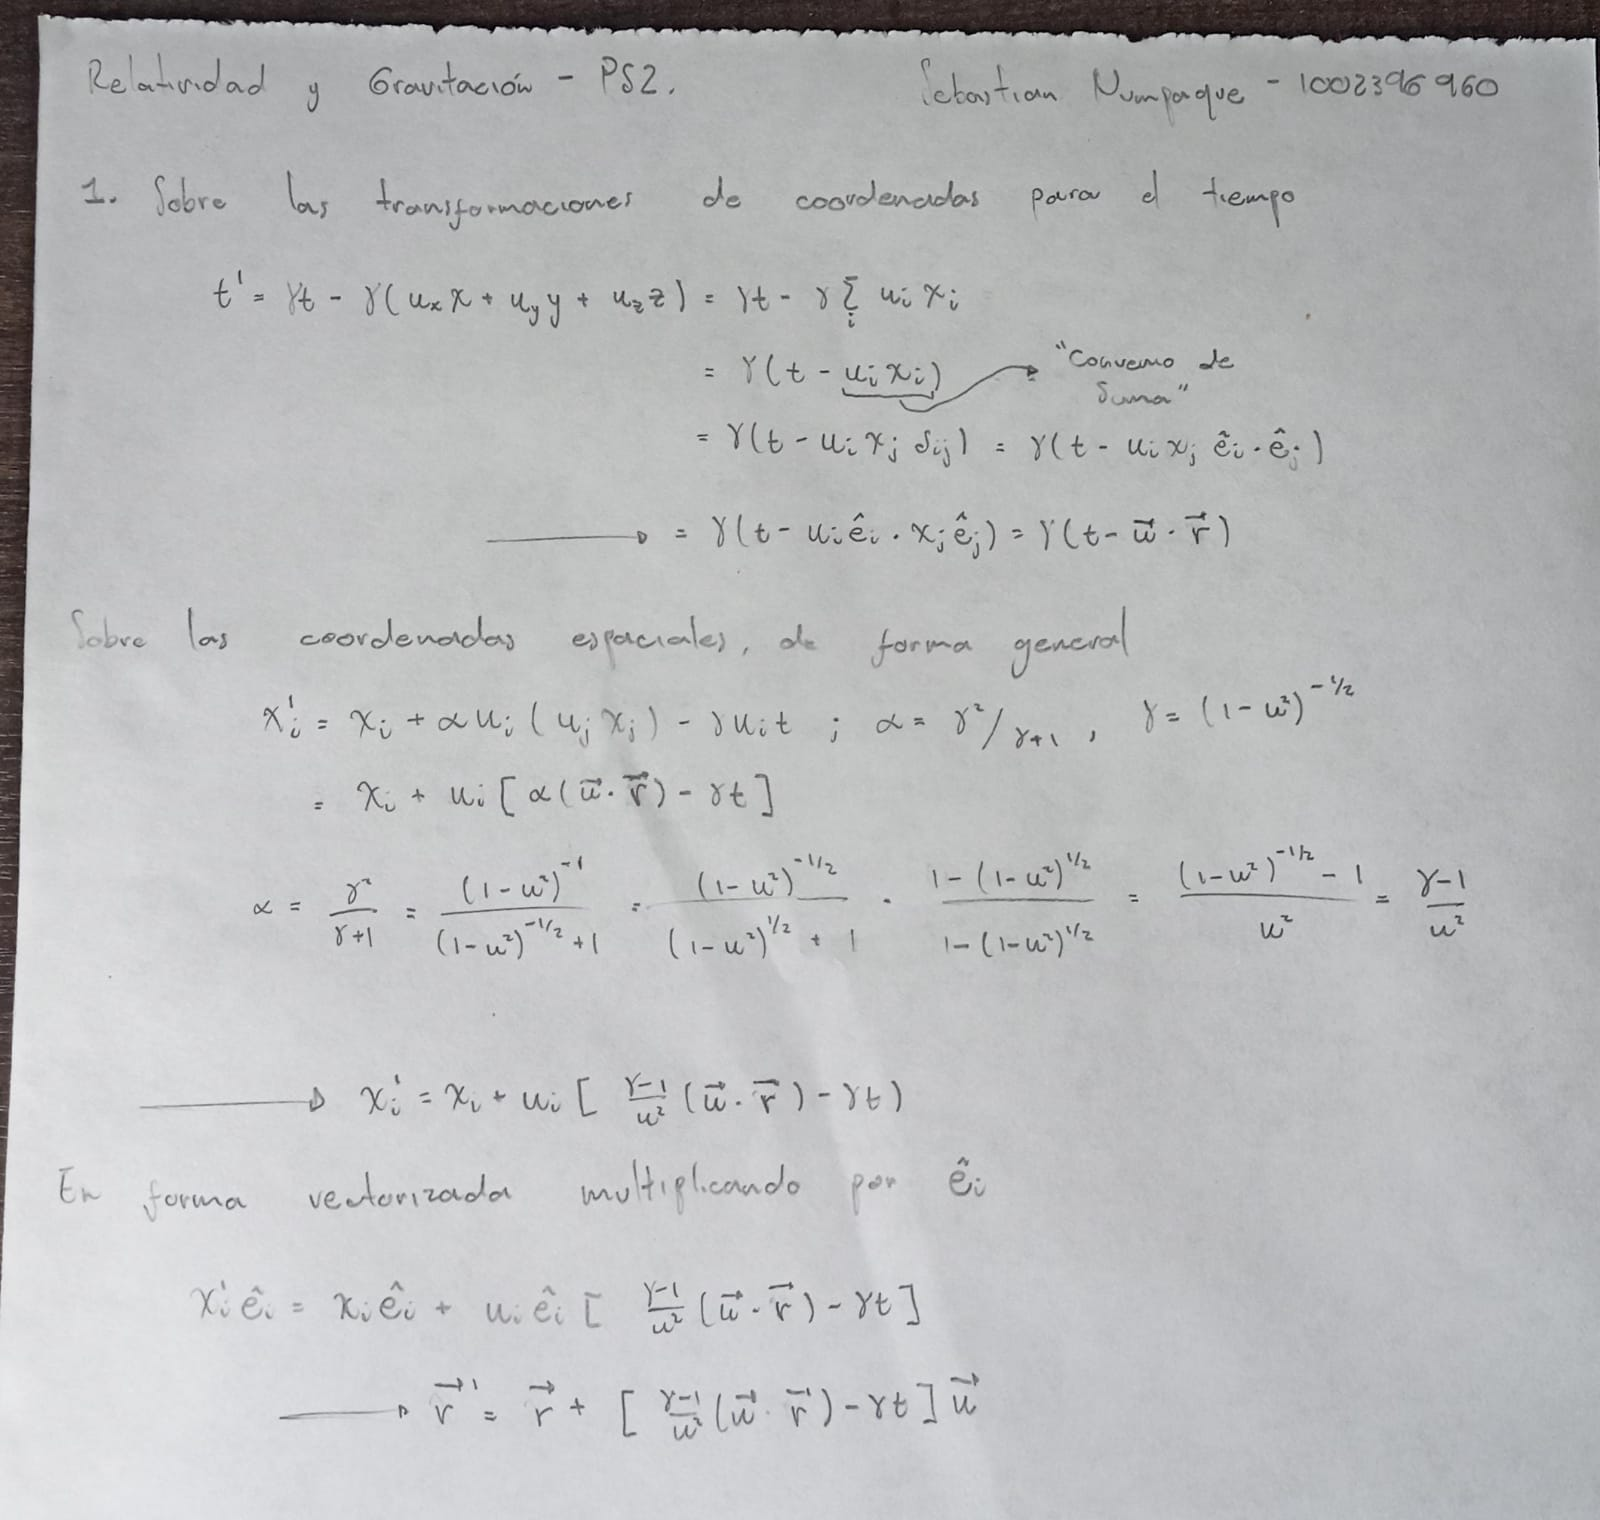

2. Las TLEs pueden escribirse usando notación matricial como:

   $$
   \left(\begin{array}{c}
t^{\prime} \\
x_L^{\prime} \\
y_L^{\prime} \\
z_L^{\prime}
\end{array}\right)=
\Lambda (\vec u_L)
\left(\begin{array}{c}
t \\
x_L \\
y_L \\
z_L
\end{array}\right)
   $$

  Muestre que las componentes de las TLEs generales del punto 1 son:

  $$
  \begin{aligned}
& \Lambda_{t^{\prime} t}=\gamma \\
& \Lambda_{t^{\prime} i}=\Lambda_{i^{\prime} t}=-\gamma \mathrm{u}_{\mathrm{L} i} \\
& \Lambda_{i^{\prime} j}=\delta_{\mathrm{ij}}+(\gamma-1) \mathrm{u}_{\mathrm{L} i} \mathrm{u}_{\mathrm{L} j} / \mathrm{u}_{\mathrm{L}}^2
\end{aligned}
  $$

  Muestre que la matriz, componente por componente, se puede escribir como:

   $$
   \Lambda(\vec u_L) = \left(\begin{array}{cccc}
\gamma & -\gamma u_{Lx} & -\gamma u_{Ly} & -\gamma u_{Lz} \\
-\gamma u_{Lx} & 1+\frac{\gamma^2}{1+\gamma} u_{Lx}^2 & \frac{\gamma^2}{1+\gamma} u_{Lx} u_{Ly} & \frac{\gamma^2}{1+\gamma} u_{Lx} u_{Lz} \\
-\gamma u_{Ly} & \frac{\gamma^2}{1+\gamma} u_{Lx} u_{Ly} & 1+\frac{\gamma^2}{1+\gamma} u_{Ly}^2 & \frac{\gamma^2}{1+\gamma} u_{Ly} u_{Lz} \\
-\gamma u_{Lz} & \frac{\gamma^2}{1+\gamma} u_{Lx} u_{Lz} & \frac{\gamma^2}{1+\gamma} u_{Ly} u_{Lz} & 1+\frac{\gamma^2}{1+\gamma} u_{Lz}^2
\end{array}\right)
   $$

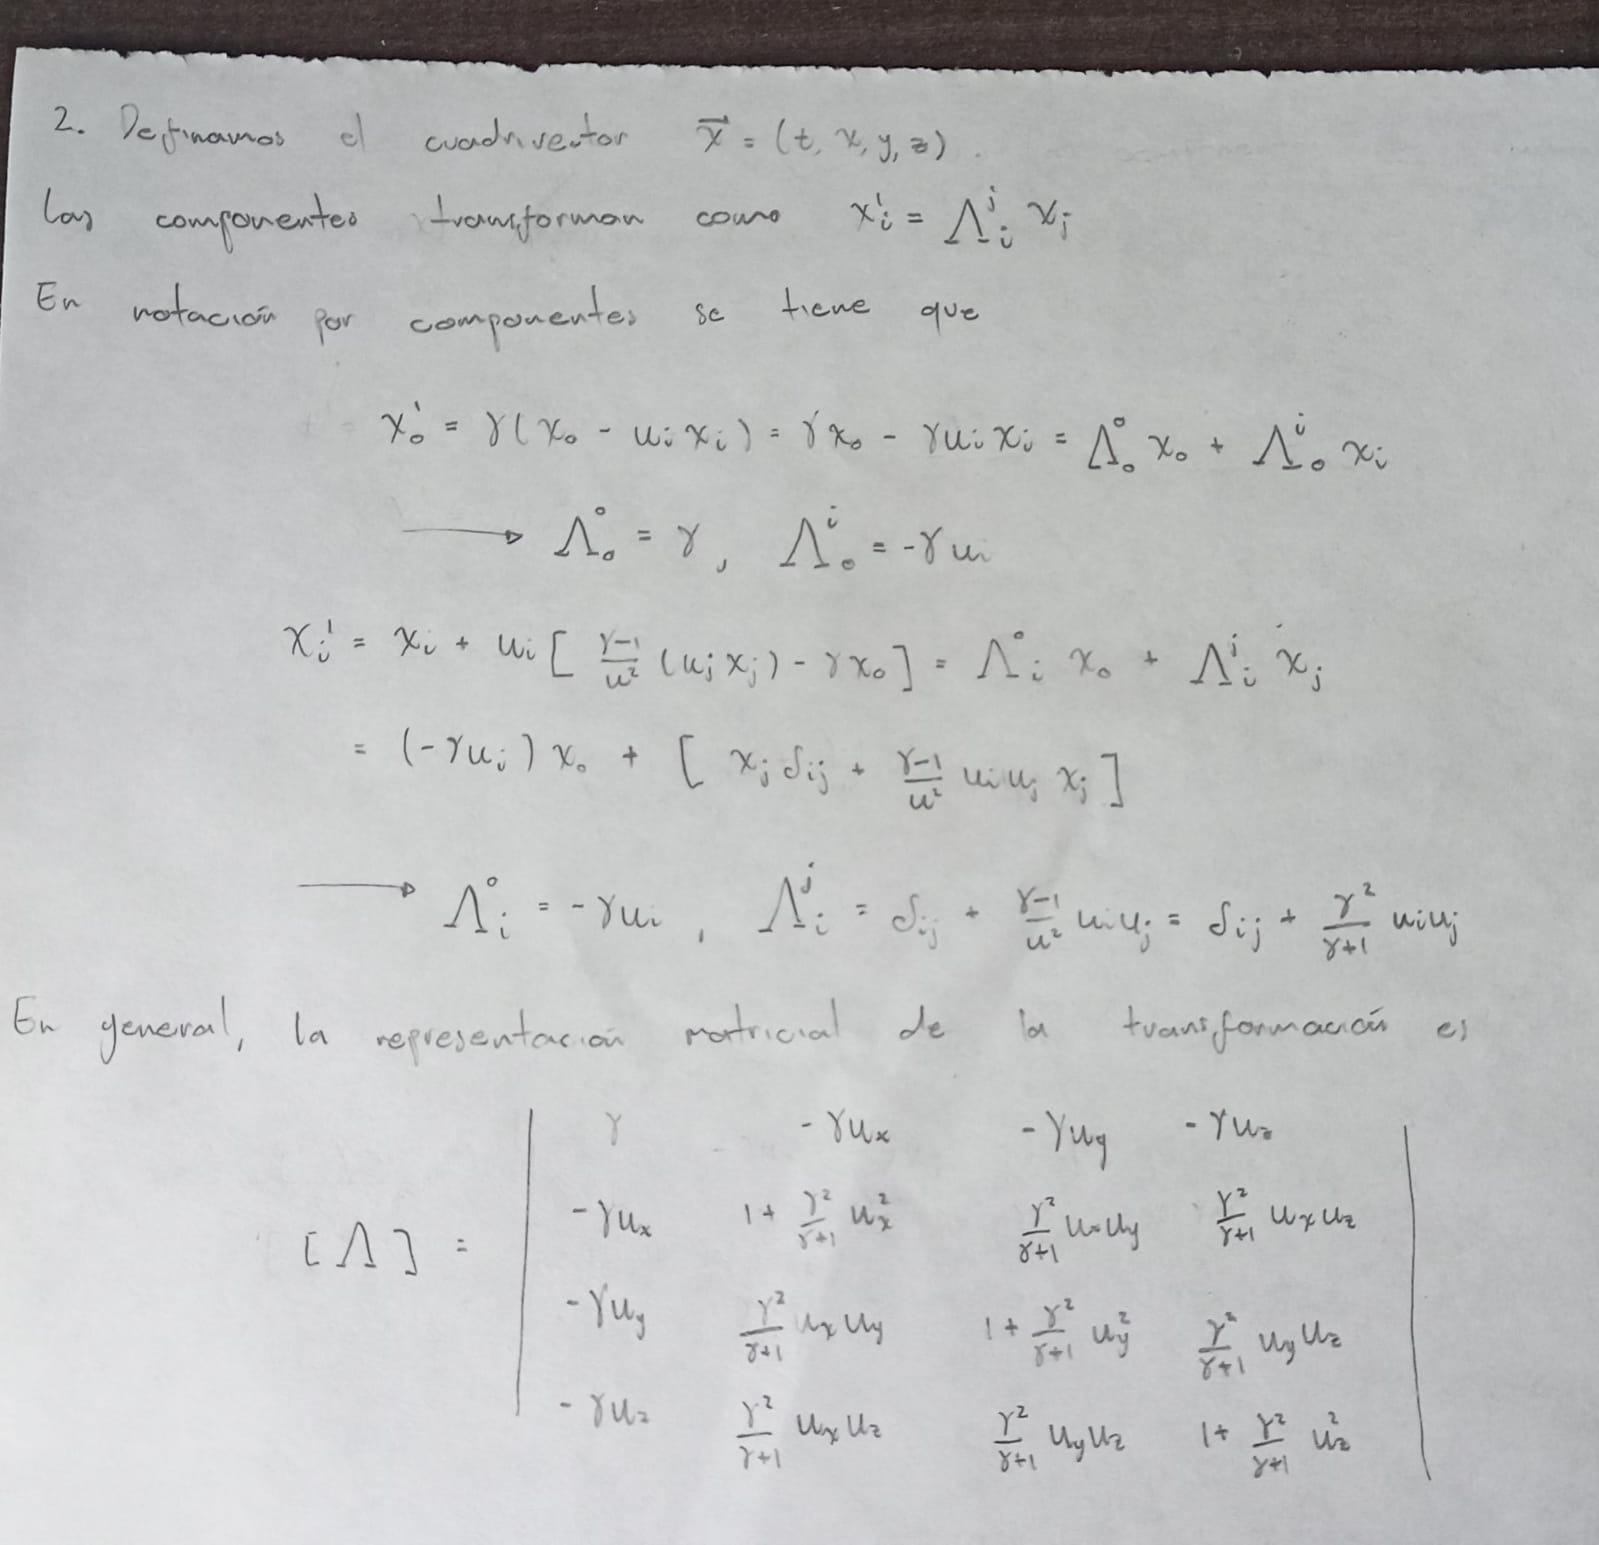



---



3. Vamos a representar gráficamente las transformaciones de velocidades. Para ello vamos a suponer que desde el origen de coordenadas del sistema del experimento (O') salen partículas con rapidez idéntica $v_L$ en todas direcciones.

  a. Escoja N direcciones del espacio y dibuje usando `quiver` (o un comando análogo) los vectores de velocidad correspondientes a cada dirección.

  b. Aplique las reglas de conversión de velocidades en la configuración estándar para encontrar las componentes de la velocidad medidas en el laboratorio. El gráfico se debe parece a la figura abajo.

  c. Construya un código interactivo que le permita modificar tanto la velocidad relativa entre los sistemas de referencia $u_L$ y la rapidez de las partículas $v_L$.

  d. Escoja $v_L=1$ (fotones). ¿Qué diferencias observa entre el caso de $v_L<1$ y el caso de los fotones?.



  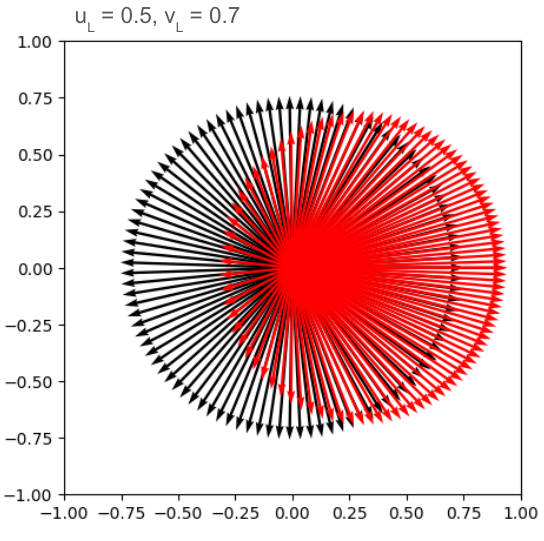

#**Solución:**

In [1]:
import numpy as np

import plotly.graph_objects as go
import plotly.figure_factory as ff

#Uniform Distribution for Velocity Components
from astropy.coordinates import uniform_spherical_random_surface

#Ejecución Correcta de Interactivos
from ipywidgets import interactive, FloatSlider, Dropdown

from google.colab import output
output.enable_custom_widget_manager()

##**Función** `transform_velocities`

Emplea la transformación de Lorentz-Einsteins sobre los vectores de velocidad

$$\vec{v}^{\prime} =\frac{1}{\gamma(1-\vec{u} \cdot \vec{v})}\left[\vec{v}+\left(\frac{\gamma-1}{u^2} \vec{u} \cdot \vec{v}-\gamma\right) \vec{u}\right]$$

In [2]:
#Transforming Velocities
def transform_velocities(uL_vec, vL_vec):

  uL = np.linalg.norm(uL_vec)
  gamma = (1 - uL**2)**-0.5

  vL_prime_vec = (uL_vec*((gamma-1)*np.dot(vL_vec,uL_vec)/uL**2 - gamma)+
                  vL_vec)/(gamma*(1 - np.dot(vL_vec, uL_vec)))

  return vL_prime_vec

- Generamos 100 direcciones de velocidad uniformemente distribuidas en el espacio a través de la función `uniform_spherical_random_surface(size)` incorporada en el modulo `astropy.coordinates`

- Realizamos la transformación de dichas velocidades considerando vector de velocidad relativa $\vec{u}=(u_L,0,0)$

- Mostramos mediante gráfico interactivo la proyección sobre distintos planos.

In [3]:
def plot_velocities(plane, uL, vL):

  #Coordinates Transformation
  x, y = np.zeros((2, 100))
  vL_vecs = vL*uniform_spherical_random_surface(100).to_cartesian().get_xyz().value.T
  vL_prime_vecs = np.array([transform_velocities(np.array([uL, 0, 0]), vL_vec)
                            for vL_vec in vL_vecs])

  i, j = (0, 1) if plane == 'X-Y' else (1, 2) if plane == 'Y-Z' else (0, 2)

  #Graficacion del Campo de Velocidades
  fig = ff.create_quiver(x, y, *vL_vecs.T[[i,j]],
                         line_width = 1, scale = 0.5,
                         arrow_scale = 0.1,
                         showlegend = False)

  fig.add_traces(ff.create_quiver(x, y, *vL_prime_vecs.T[[i,j]],
                                line_width = 1, scale = 0.5,
                                arrow_scale = 0.1,
                                showlegend = False)['data'])

  fig.update_layout(width = 900, height = 600,
                    xaxis_title = rf'$u_{{{plane[0]}}}$',
                    yaxis_title = rf'$u_{{{plane[-1]}}}$',
                    title_text = f'Velocities Field ({plane} Plane)',
                    title_x = 0.5, title_y = 0.93,
                     yaxis_scaleanchor = "x")

  fig.show()

- Caso $v=1$: Observamos que los vectores de velocidad tienden hacia la alineación de los vectroes en el sistema del observador. En el caso de la luz, esto indica su invarianza bajo las transformaciones dado que su magnitud es igualmente medible en todos los sistemas de referencia

In [4]:
interactive(plot_velocities,
            plane = Dropdown(options = ['X-Y', 'Y-Z', 'X-Z']),
            uL = FloatSlider(min = 0, max = 1, step=0.1,
                             description = 'uL', value = 0.5,
                             continuous_update = False),
            vL = FloatSlider(min = 0, max = 1, step=0.1,
                             description = 'vL', value = 0.5,
                             continuous_update = False))

interactive(children=(Dropdown(description='plane', options=('X-Y', 'Y-Z', 'X-Z'), value='X-Y'), FloatSlider(v…



---



4. En clase calculamos la magnitud de la aberración cuando una estrella se encuentra en el mismo meridiano eclíptico en el que está el vector velocidad de la Tierra. Vamos a calcular la magnitud de la aberración cuando la estrella está en una posición arbitraria de la esfera celeste en longitud eclíptica $\lambda$ y latitud eclíptica $\beta$. Para ello:

   a. Escriba explícitamenete las componentes $x$, $y$, $z$ de la velocidad de un fotón procedente de la estrella, en el sistema de referencia del baricentro del sistema solar y como función de las coordenadas eclípticas.

   b. En un momento dado del año las componentes de la velocidad de la Tierra son $u_x$ y $u_y$ (que pueden calcularse usando `SPICE` o `astroquery`). Encuentre expresiones para las coordenadas eclípticas aparentes $\lambda'$ y $\beta'$ para una estrella usando la ley generalizada de transformación de velocidades.

   c. Escoja una estrella que pertenezca a la constelación de su signo zodiacal. Averigue sus coordenadas eclípticas respecto al baricentro del sistema solar. Calcule, usando las expresiones en b, la diferencia entre las coordenadas eclípticas aparente y las referidas al baricentro en la fecha de su cumpleaños en 2024.

   d. (Opcional) Grafique las coordenadas eclípticas aparentes durante un año completo para la estrella elegida.


#**Solución:**

In [5]:
from plotly.subplots import make_subplots

from astropy.time import Time
from astropy.constants import c
from astropy.coordinates import SkyCoord, get_body_barycentric_posvel

- Empleamos la clase `SkyCoord` integrada dentro de `astropy.coordinates` para el manejo y transformaciones de coordenadas en distintos sistemas

- Seleccionamos el sistema `barycentrictrueecliptic` como coordenadas eclípticas respecto al baricentro del sistema solar sobre el marco ICRS

- Obtenemos vectores de velocidad de la tierra $\vec{u}$ bajo la función `get_body_barycentric_posvel(body, time)` a lo largo de un año

- Seleccionamos la estrella Altarf de la constelación de Cancer

In [6]:
times = Time(np.linspace(Time('2024-01-01').jd,
                         Time('2024-12-31').jd, 366),
             format='jd')

star_coords = SkyCoord.from_name('Altarf').barycentrictrueecliptic

earth_vels = get_body_barycentric_posvel('earth', times)[1]/c

- Asumiendo que las coordenadas de la estrella no cambian durante un año (estrellas fijas), realizamos la transformación de velocidades para la velocidad de fotones que provienen de dicha dirección

  $$\vec{v}=-c(\cos\beta\cos\lambda, \cos\beta\sin\lambda, \sin\beta)\quad;\quad c=1$$

  $$\vec{v}\,'=\Lambda(\vec{u})\,\vec{v}$$

  $$\vec{v}\,'=-c(\cos\beta'\cos\lambda', \cos\beta'\sin\lambda', \sin\beta')\quad;\quad c=1$$

- Finalmente, calculamos coordenadas eclípticas mediante las rutinas incorporadas en la clase `SkyCoord` al vector de velocidad transformado

In [7]:
vL_primes = np.array([-transform_velocities(
                       uL_vec = earth_vel.get_xyz().decompose().value,
                       vL_vec = -star_coords.cartesian.get_xyz().value)
                      for earth_vel in earth_vels])

star_coords_prime = SkyCoord(*vL_primes.T, frame = 'icrs',
                             representation_type = 'cartesian'
                             ).transform_to('barycentrictrueecliptic')

- Ploteamos la transformación de coordenadas que sufre la estrella por efecto relativista a lo largo de un año

In [8]:
fig = make_subplots(specs = [[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x = times.datetime,
                         y = star_coords_prime.lat,
                         name = 'Lat'),
               secondary_y = False)

fig.add_trace(go.Scatter(x = times.datetime,
                         y = star_coords_prime.lon,
                         name = 'Lon'),
               secondary_y = True)

fig.update_layout(title_x = 0.5, title_y = 0.93,
                  width = 1000, height = 600,
                  title_text = 'Ecliptic Coordinates (Altarf)',
                  legend = dict(orientation = 'h', x = 0.8, y = 1.1))

fig.update_yaxes(title_text = 'Ecliptic Latitude [Deg]',
                 secondary_y=False)
fig.update_yaxes(title_text = 'Ecliptic Longitude [Deg]',
                 secondary_y=True)



---



5. El crucero espacial de la **Federación**, *Execrable*, está flotando en reposo en territorio de la Federación con respecto a la frontera del espacio Klingon, que está a 6.0 min-luz de distancia en la dirección +x.

  Súbtamente, una nave de guerra de Klingon vuela pasando al crucero en la dirección de la frontera con una rapidez $u_L = 3/5$. Llame a esto evento A, y defina el tiempo cero en los marcos de referencia de Klingon y del crucero.
  
  En $t_B$ = 5.0 min de acuerdo con relojes del crucero, la nave de Klingon emite un estallido perturbador de partida (evento B) que viaja con la rapidez de la luz hacia el crucero.
  
  El estallido golpea al crucero y lo incapacita (evento C) y un poco más tarde (de acuerdo con mediciones de radar del crucero) la nave de Klingon cruza la frontera hacia su territorio (evento D).

  a. Dibuje un diagrama espacio-tiempo de dos observadores de la situación, tomando al crucero para definir al sistema de referencia del laboratorio (O) y a la nave de guerra de Klingon para definir el sistema de referencia del experimento (O'). Dibuje y etiquete las líneas de mundo del crucero, la frontera de territorio Klingon, la nave de guerra de Klingon y el estallido perturbador. Dibuje y etiquete los eventos A, B, C y D como puntos sobre su diagrama.

  b. ¿Cuándo golpea el estallido perturbador y cuándo pasan los Klingon hacia su propio territorio, de acuerdo con los relojes en el marco del crucero? Responda mediante la lectura de los tiempos de dichos eventos directamente del diagrama.

  c. El Tratado Klingon-Federación establece que es ilegal que una nave Klingon en territorio de la Federación dañe propiedad de ésta. Cuando el caso llega a una corte interestelar, los emisarios de Klingon afirman que están dentro de la ley: de acuerdo con mediciones realizadas en su marco de referencia, el daño al Execrable ocurrió después de que habían cruzado hacia territorio Klingon: por lo tanto, ellos no estaban en territorio de la Federación en ese momento. ¿El evento C (el estallido perturbador golpea al Execrable) en realidad ocurrió después que el evento D (la nave de Klingon cruza la frontera) en el marco de estos últimos? Responda la pregunta utilizando su diagrama de dos observadores y compruebe su trabajo con las ecuaciones de transformación de Lorentz.

**NOTAS**: Debe dibujar a mano los diagramas espacio temporales.

#**Solución:**

El estallido golpea el crucero de la federación en $\sim$8 min durante el evento **C**. Al poco tiempo ($\sim$10 min) la nave de guerra Klingon cruza su frontera en el evento **D**. Según esto, la nave de guerra ha incumplido el tratado pues realizó un ataque dentro de territorio de la federación durante el evento **B**. Los eventos han ocurrido progresivamente

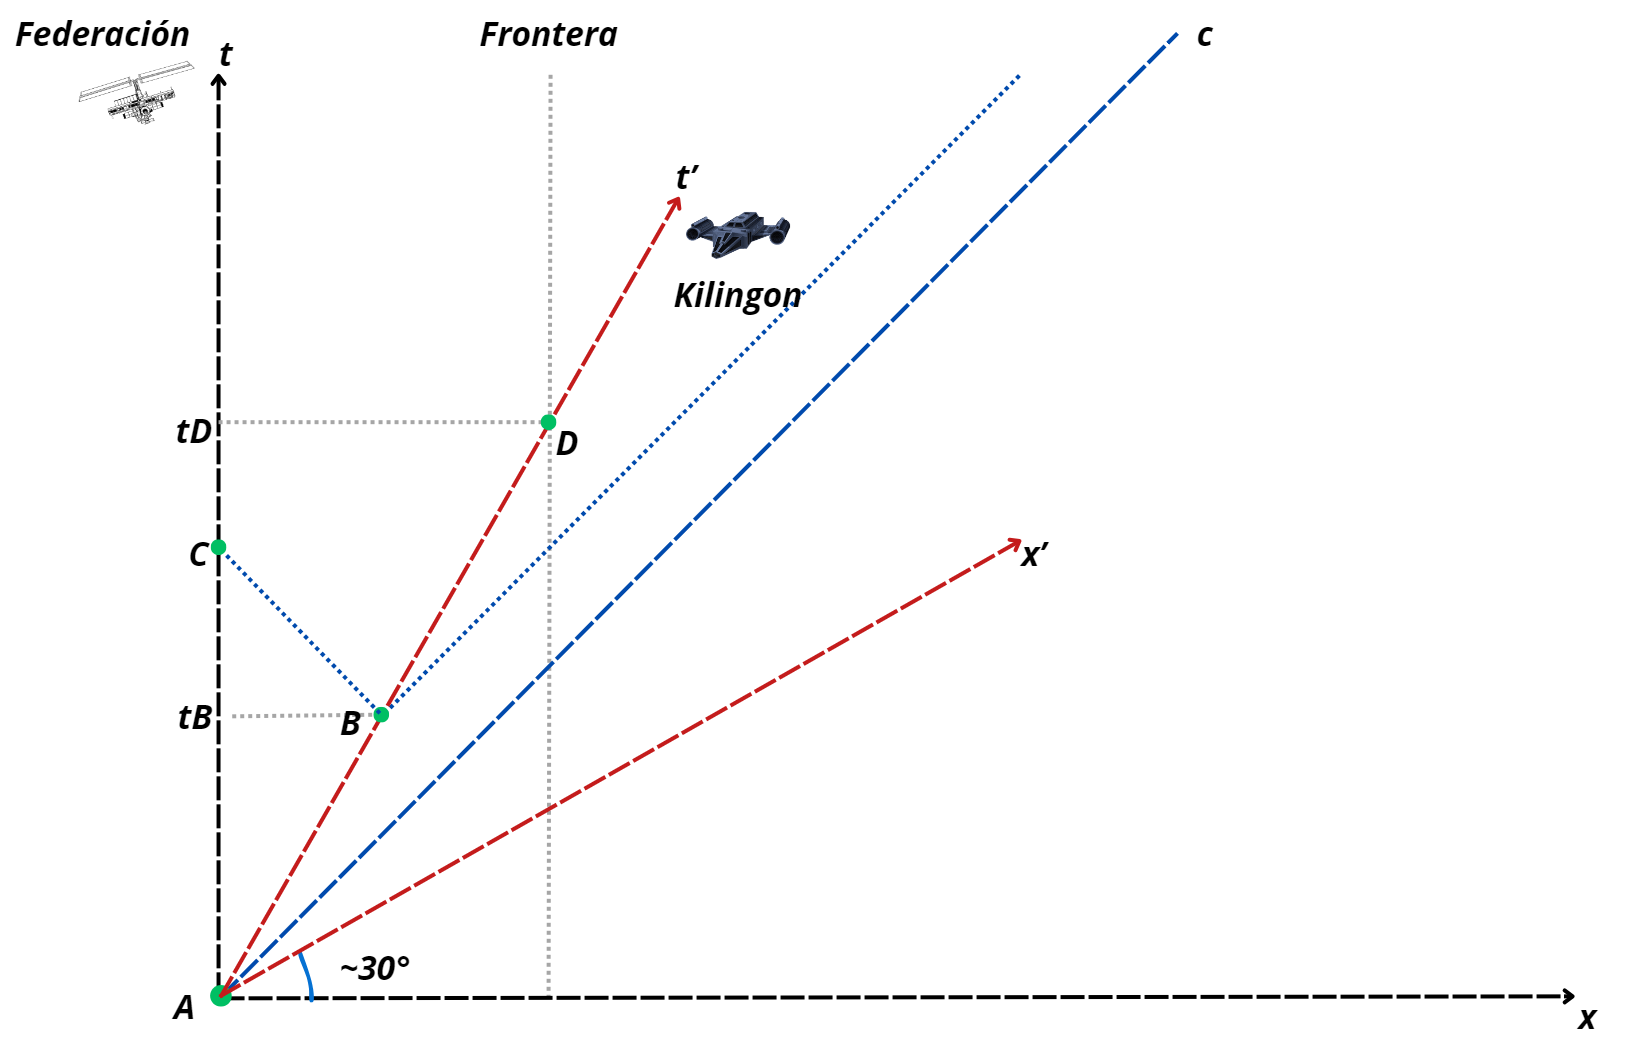